In [6]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#the following two lines come from https://medium.com/mlreview/topic-modeling-with-scikit-learn-e80d33668730
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.decomposition import NMF,LatentDirichletAllocation

# SPOOKY Text Data Analysis

## Data Retrieval and Cleaning

In [7]:
spooky = pd.read_csv('..\data\spooky.csv', sep=',', header = 0)

In [8]:
spooky.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [9]:
spooky.shape

(19579, 3)

In [10]:
eap = spooky.loc[spooky['author'] == 'EAP']
hpl = spooky.loc[spooky['author'] == 'HPL']
mws = spooky.loc[spooky['author'] == 'MWS']

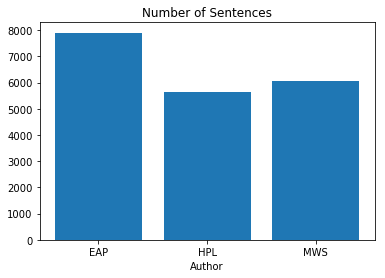

In [11]:
a_names = ['EAP', 'HPL', 'MWS']
y_pos = np.arange(len(a_names))
num_sent = [len(eap),len(hpl),len(mws)]
 
plt.bar(y_pos, num_sent, align='center', alpha=1)
plt.xticks(y_pos, a_names)
plt.xlabel('Author')
plt.title('Number of Sentences')
 
plt.show()

### Sentiment Analysis

In [ ]:
# inspired by http://www.nltk.org/howto/sentiment.html
#from nltk.classify import NaiveBayesClassifier
#from nltk.corpus import subjectivity
#from nltk.sentiment import SentimentAnalyzer

In [3]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def avg_polar_score(sentences,sia):
    '''Takes some sentences and a SentimentIntensityAnalyzer object and returns average of their polarity scores'''
    n = sentences.size
    scores = {"neg" : 0,"neu" : 0,"pos" : 0,"compound" : 0}
    
    for sentence in sentences:
        
        ss = sia.polarity_scores(sentence)
        
        for k in sorted(ss):
            scores[k] += ss[k]
    #print('{0}: {1}, '.format(k, ss[k]), end='')
    for j in sorted(scores):
        scores[j] = round((scores[j]/n),3)
    
    return(scores)

C:\Users\David\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [12]:
some_sia = []

some_sia.append(avg_polar_score(eap.text.as_matrix(),SentimentIntensityAnalyzer()))
some_sia.append(avg_polar_score(hpl.text.as_matrix(),SentimentIntensityAnalyzer()))
some_sia.append(avg_polar_score(mws.text.as_matrix(),SentimentIntensityAnalyzer()))

In [26]:
author_names = ['Edgar Allen Poe','H.P. Lovecraft','Mary Wolstencraft Shelly']
i = 0
for dic in some_sia:
    print(author_names[i])
    i += 1
    for k in sorted(dic):
        print('{0}: {1}, '.format(k, dic[k]), end='')
    print('\n')

Edgar Allen Poe
compound: 0.042, neg: 0.074, neu: 0.84, pos: 0.086, 

H.P. Lovecraft
compound: -0.068, neg: 0.092, neu: 0.838, pos: 0.071, 

Mary Wolstencraft Shelly
compound: 0.063, neg: 0.104, neu: 0.77, pos: 0.126, 



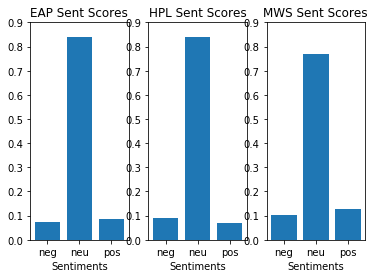

In [34]:
plt.figure(1)

plt.subplot(131)
sents = ['neg', 'neu', 'pos']
y_pos = np.arange(len(sents))
sent_scores = [.074, .84, .086]

plt.ylim(0,.9)
plt.bar(y_pos, sent_scores, align='center', alpha=1)
plt.xticks(y_pos, sents)
plt.xlabel('Sentiments')
plt.title('EAP Sent Scores')

plt.subplot(132)
sents = ['neg', 'neu', 'pos']
y_pos = np.arange(len(sents))
sent_scores = [.092, .838, .071]

plt.ylim(0,.9)
plt.bar(y_pos, sent_scores, align='center', alpha=1)
plt.xticks(y_pos, sents)
plt.xlabel('Sentiments')
plt.title('HPL Sent Scores')

plt.subplot(133)
sents = ['neg', 'neu', 'pos']
y_pos = np.arange(len(sents))
sent_scores = [.104, .77, .126]

plt.ylim(0,.9)
plt.bar(y_pos, sent_scores, align='center', alpha=1)
plt.xticks(y_pos, sents)
plt.xlabel('Sentiments')
plt.title('MWS Sent Scores')

plt.show()

## Topic Modeling

In [14]:
#topic modeling code inspired by https://medium.com/mlreview/topic-modeling-with-scikit-learn-e80d33668730
#the idea to compare lda and nmf was blantantly borrowed from the above post

#intialize the vectorizers
#this one is for lda
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')
#below for nmf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')

In [15]:
#clean data for nmf
tfidf_eap = tfidf_vectorizer.fit_transform(eap.text)
tfidf_feature_names_eap = tfidf_vectorizer.get_feature_names()

tfidf_hpl = tfidf_vectorizer.fit_transform(hpl.text)
tfidf_feature_names_hpl = tfidf_vectorizer.get_feature_names()

tfidf_mws = tfidf_vectorizer.fit_transform(mws.text)
tfidf_feature_names_mws = tfidf_vectorizer.get_feature_names()

In [16]:
#clean data for lda
sent_clean = [[],[],[]]
feature_names = [[],[],[]]
t = 0
for series in [eap.text,hpl.text,mws.text]:
    tf = tf_vectorizer.fit_transform(series)
    tf_feature_names = tf_vectorizer.get_feature_names()
    
    sent_clean[t] = tf
    feature_names[t] = tf_feature_names
    t = t + 1

In [17]:
#this is just for remebering where each author's senetecnes are
eap_clean = sent_clean[0]
hpl_clean = sent_clean[1]
mws_clean = sent_clean[2]

Some experimentation showed that 15 topics gave some plausible and helful results

In [18]:
n_top = 15

In [19]:
#Run lda for all the authors
lda_eap = LatentDirichletAllocation(n_topics=n_top, max_iter=5, learning_method='online',learning_offset=50.,random_state=0).fit(eap_clean)

lda_hpl = LatentDirichletAllocation(n_topics=n_top, max_iter=5, learning_method='online',learning_offset=50.,random_state=0).fit(hpl_clean)

lda_mws = LatentDirichletAllocation(n_topics=n_top, max_iter=5, learning_method='online',learning_offset=50.,random_state=0).fit(mws_clean)

In [20]:
#Run nmf for all authors
nmf_eap = NMF(n_components=n_top, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf_eap)

nmf_hpl = NMF(n_components=n_top, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf_hpl)

nmf_mws = NMF(n_components=n_top, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf_mws)

In [21]:
#this cell from https://medium.com/mlreview/topic-modeling-with-scikit-learn-e80d33668730
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("%d:" % (topic_idx))
        s = ' '
        print(s.join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [27]:
display_topics(lda_mws,feature_names[2],7)

0:
light strength thought wish lived power stood
1:
man soon great length high desire danger
2:
life death time men father gave look
3:
day let know sun present happy hear
4:
raymond perdita eyes make entered tears rose
5:
love old hope long voice despair man
6:
air sea happiness country hand england thoughts
7:
said world friend adrian mother good sister
8:
earth nature felt near friends die place
9:
change looked fear years lovely spoke evil
10:
house began thy went filled door thou
11:
night saw return appeared elizabeth heard strange
12:
mind did passed feelings life days misery
13:
father come end little left cried led
14:
shall heart words feel soul human joy


In [28]:
display_topics(nmf_mws,tfidf_feature_names_mws,7)

0:
eyes father saw like tears thought mind
1:
raymond lord replied secret lost room gave
2:
love let sympathy gratitude affection greece gentle
3:
did appear understand come know return pass
4:
life existence alas hope lost new feeling
5:
said dear better present best friend companion
6:
day night passed sun following hour close
7:
man old world young nature earth creation
8:
shall true die know make appear feel
9:
time long mean spent short greece come
10:
perdita mentioned evadne child length joined account
11:
adrian idris promised visit sister health feared
12:
heart remorse soul fear grief despair filled
13:
years passed age nearly old lived early
14:
death fear disease words dead oh evil


### Visualizing the Topics

In [108]:
from __future__ import print_function
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [111]:
# inspired by http://nbviewer.jupyter.org/github/bmabey/pyLDAvis/blob/master/notebooks/sklearn.ipynb
dtm_tf_eap = tf_vectorizer.fit_transform(eap.text)
lda_eap.fit(dtm_tf_eap)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=5, mean_change_tol=0.001,
             n_jobs=1, n_topics=15, perp_tol=0.1, random_state=0,
             topic_word_prior=None, total_samples=1000000.0, verbose=0)

In [113]:
pyLDAvis.sklearn.prepare(lda_eap, dtm_tf_eap, tf_vectorizer)

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
8      10.188440        1       1 -0.145036 -0.166549
10      7.858091        1       2  0.123416 -0.064581
11      7.752683        1       3 -0.152267 -0.107478
2       7.028311        1       4 -0.047439 -0.047529
5       6.936625        1       5  0.185128 -0.142400
1       6.936236        1       6  0.105129 -0.091808
13      6.553366        1       7 -0.168627 -0.040964
14      6.526210        1       8 -0.212929 -0.045300
4       6.523457        1       9  0.174196 -0.127329
0       6.104578        1      10  0.006008  0.016973
9       5.991609        1      11  0.154133  0.104900
3       5.661671        1      12 -0.009239  0.137047
6       5.571072        1      13  0.065195  0.129608
7       5.487093        1      14 -0.003022  0.232176
12      4.880557        1      15 -0.074646  0.213233, topic_info=     Category        Freq           Term       Total  loglift  logprob
term                                                                  
508   Default  273.000000         little  273.000000  30.0000  30.0000
778   Default  336.000000           said  336.000000  29.0000  29.0000
498   Default  181.000000         length  181.000000  28.0000  28.0000
213   Default  194.000000            did  194.000000  27.0000  27.0000
908   Default  172.000000        thought  172.000000  26.0000  26.0000
916   Default  259.000000           time  259.000000  25.0000  25.0000
784   Default  260.000000            say  260.000000  24.0000  24.0000
585   Default  171.000000             mr  171.000000  23.0000  23.0000
537   Default  251.000000            man  251.000000  22.0000  22.0000
409   Default  160.000000           head  160.000000  21.0000  21.0000
901   Default  142.000000          thing  142.000000  20.0000  20.0000
499   Default  138.000000            let  138.000000  19.0000  19.0000
513   Default  204.000000           long  204.000000  18.0000  18.0000
393   Default  213.000000          great  213.000000  17.0000  17.0000
190   Default  171.000000            day  171.000000  16.0000  16.0000
179   Default  127.000000         course  127.000000  15.0000  15.0000
388   Default  139.000000           good  139.000000  14.0000  14.0000
565   Default  128.000000           mind  128.000000  13.0000  13.0000
408   Default  183.000000         having  183.000000  12.0000  12.0000
807   Default  126.000000          shall  126.000000  11.0000  11.0000
473   Default  131.000000           just  131.000000  10.0000  10.0000
303   Default  115.000000           fact  115.000000   9.0000   9.0000
235   Default  114.000000           door  114.000000   8.0000   8.0000
988   Default  115.000000          words  115.000000   7.0000   7.0000
115   Default  127.000000           came  127.000000   6.0000   6.0000
369   Default  114.000000        general  114.000000   5.0000   5.0000
538   Default  108.000000         manner  108.000000   4.0000   4.0000
534   Default  122.000000           make  122.000000   3.0000   3.0000
502   Default  106.000000           life  106.000000   2.0000   2.0000
626   Default  136.000000            old  136.000000   1.0000   1.0000
...       ...         ...            ...         ...      ...      ...
933   Topic15   67.482792         turned   68.709999   3.0019  -3.3796
587   Topic15   38.136075         murder   39.067012   2.9958  -3.9503
290   Topic15   36.602590      existence   37.517512   2.9952  -3.9913
507   Topic15   36.416980           lips   37.330975   2.9951  -3.9964
94    Topic15   34.229086         bodies   35.143438   2.9935  -4.0584
713   Topic15   33.146099     proportion   34.066000   2.9925  -4.0905
791   Topic15   32.406662         search   33.339192   2.9915  -4.1131
971   Topic15   31.299480         weight   32.213305   2.9911  -4.1479
954   Topic15   31.047927       vicinity   32.000064   2.9897  -4.1559
657   Topic15   40.103546         people   41.438525   2.

In [101]:
def get_topics(model, feature_names, no_top_words):
    topic_summ = []
    for topic_idx, topic in enumerate(model.components_):
        #t_idx = '{0}'.format(topic_idx)
        s = ' '.join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
        topic_summ.append(s)
    return(topic_summ)